# Marketing Analytics: Predicting Customer Churn in Python

Course Description

Churn dihitung dari berapa banyak pelanggan meninggalkan bisnis Anda dalam waktu tertentu. Customer churn penting diketahui bisnis karena merupakan gambaran kesuksesan suatu bisnis dalam mempertahankan pelanggan. Churn adalah masalah umum di semua industri. Perusahaan yang dapat memprediksi churn dapat mengambil tindakan proaktif untuk mempertahankan pelanggan yang berharga dan dapat unggul dalam persaingan.

Pelanggan yang membatalkan layanan karena berbagai alasan termasuk kurangnya penggunaan, layanan yang buruk, atau harga yang mahal.

`Data`
Data yang akan Anda gunakan berasal dari kumpulan data Penggunaan Seluler yang terdiri dari catatan pelanggan dan fitur Ponsel yang sebenarnya

# Conclusion
`Pada Processing` Saya Drop Kolom yang tidak akan memberi Kinerja Machine learning: 
- `Area_Code`, `State`, dan	`Phone` Karena merupakan kolom unik
- Kolom menit telepon (`Day_Mins`, `Eve_Mins`, `Intl_Mins`dan `Night_Mins`) karena hal itu sudah mewakili kolom harga yang dikeluarkan
- Terakhir saya drop kolom Vmail_Plan karena ini sudah mewakili Vmail_Message yang dilakukan

churner tampaknya melakukan lebih banyak panggilan layanan pelanggan daripada non-churner.

`Accuracy_score` Sebesar 0.940 Setelah melakukan sedikit Hyperparameter menjadi 0.943 Dan beberapa Matric Yang berubah

`Feature importances` diurutan pertama ada Day_charge, Custservis_calls, Eve Charge, intl_plan, Intl Charge Night Charge, intl cals

# 1. Exploratory Data Analysis

## 1.1 Descriptive Statistics

In [1]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Import Data
telco = pd.read_csv('Telco Churn Dataset.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [2]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

- Data memiliki 3333 row dan 21 Kolom
- Data tidak memiliki Null Value 
- phone masih dalam bentuk object

In [3]:
cats = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'State', 'Phone']
nums = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls','Day_Calls', 'Day_Charge', 'Eve_Calls', 
        'Eve_Charge', 'Night_Calls', 'Night_Charge',  'Intl_Calls', 'Intl_Charge', 'Area_Code']

In [4]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [5]:
telco[cats].describe()

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,382-4657
freq,2850,3010,2411,106,1


- Phone tidak akan dipakai dalam machine learning, karena merupakan unik Value, Karena tidak akan memberi insight 
- State akan dipertimbangkan kembali untuk masuk Machine learning mengingat nilai uniq nya yang banyak
- Churn ada 483 dan nonChurn 2850

## 1.2 Univariate Analysis
Setelah melakukan analisis statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

C:\Users\Rahul\AppData\Local\Temp/ipykernel_316/1987597048.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(plot)/2, i+1)
D:\Anacondaa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahul\AppData\Local\Temp/ipykernel_316/1987597048.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(plot)/2, i+1)
D:\Anacondaa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in

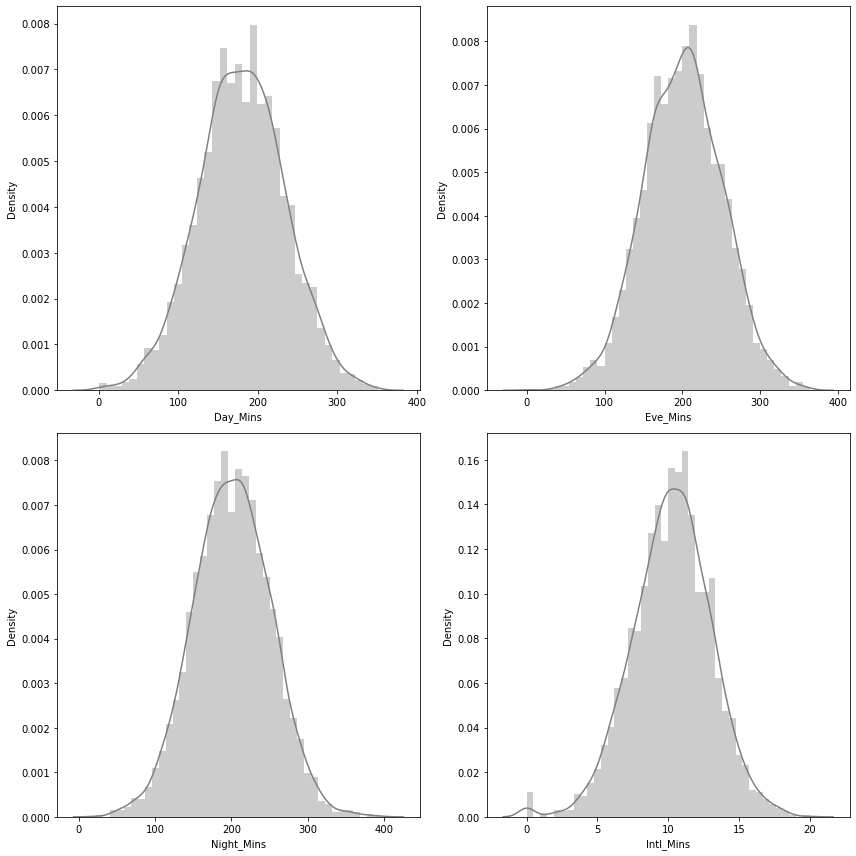

In [6]:
plot = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']

plt.figure(figsize=(12, 12))
for i in range(0, len(plot)):
    plt.subplot(2, len(plot)/2, i+1)
    sns.distplot(telco[plot[i]], color='gray')
    plt.tight_layout()

fitur memiliki distribusi normal. Jika tidak demikian, kita harus mempertimbangkan untuk menerapkan semacam fitur transformasi.

## 1.3 Multivariate Analysis

<AxesSubplot:>

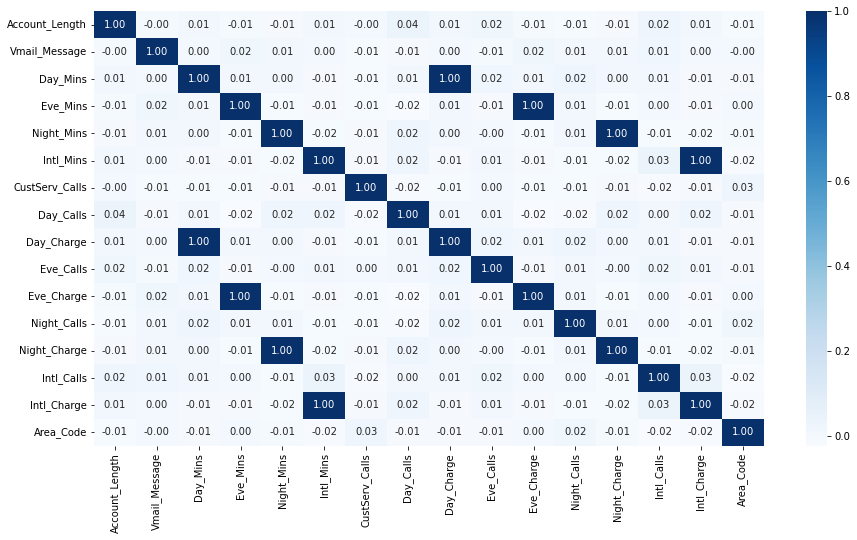

In [7]:
# untuk memudahkan Visualisasi korelasi antar kolom dengan sns.heatmap(df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(telco.corr(), cmap='Blues', annot=True, fmt='.2f')

- Pada Univariate Analysis kita melihat bahwa ada 4 pasangan memiliki korelasi sangat kuat (1)
Dimana biaya dan lama telpon pada panggilan siang, sore, malam, dan internasional

## churners VS non-churners

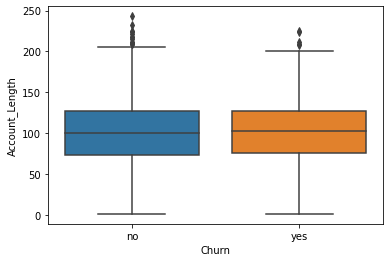

In [8]:
#Differences in account length
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco)
plt.show()

tampaknya tidak ada perbedaan mencolok dalam panjang akun.

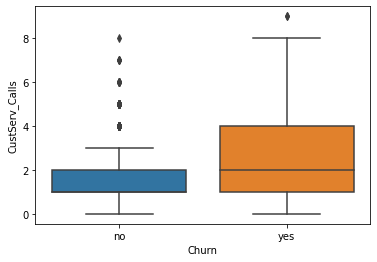

In [9]:
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

pelanggan yang melakukan churn akhirnya meninggalkan lebih banyak panggilan layanan pelanggan, kecuali pelanggan ini juga memiliki paket internasional, dalam hal ini mereka meninggalkan lebih sedikit panggilan layanan pelanggan. 

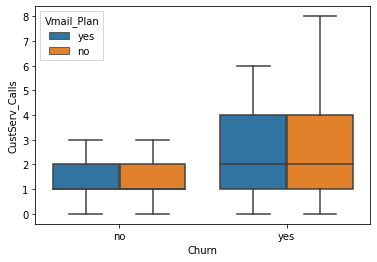

In [10]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")
# Display the plot
plt.show()

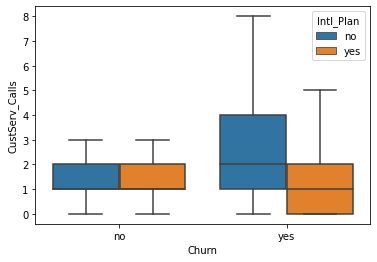

In [11]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

In [12]:
# Ringkasan statistik untuk kedua kelas
# Group telco by 'Churn' and compute the mean
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [13]:
#  standard deviation
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


- churner tampaknya melakukan lebih banyak panggilan layanan pelanggan daripada non-churner.

# 2. Data Preprocessing 
setelah melakukan analisis eksplorasi dan memiliki pemahaman yang lebih baik tentang kumpulan data, saatnya memprosesnya data untuk persiapan pemodelan.
- membuang data yang tidak diperlukan
- handling null value
- handling data distributed (feature scalling)
- handling categorical variables as numeric (One Hot encoding)

## 2.1 Encoding binary features

In [14]:
telco[cats].describe()

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,382-4657
freq,2850,3010,2411,106,1


Kolom `Churn, Intl_Plan, dan Vmail_Plan` merupakan kolom binner
Sementara  state dan phone saya drop

In [15]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 , 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0 , 'yes':1})

# Print the results to verify
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


<AxesSubplot:>

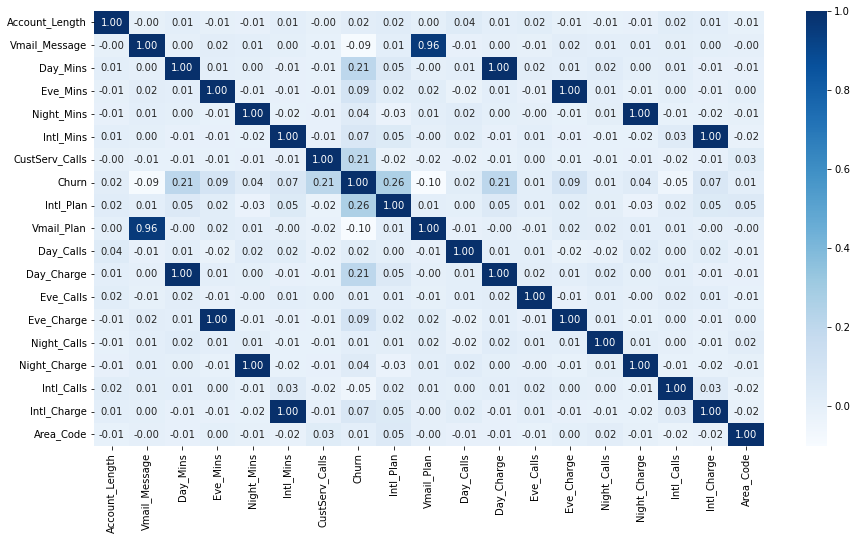

In [16]:
# untuk memudahkan Visualisasi korelasi antar kolom dengan sns.heatmap(df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(telco.corr(), cmap='Blues', annot=True, fmt='.2f')

## feature selection

In [17]:
telcoabc = telco[['Day_Charge','Day_Mins',
                 'Eve_Charge', 'Eve_Mins',
                 'Intl_Charge','Intl_Mins',
                 'Night_Charge','Night_Mins']]
telcoabc.head()

,Day_Charge,Day_Mins,Eve_Charge,Eve_Mins,Intl_Charge,Intl_Mins,Night_Charge,Night_Mins
0,45.07,265.1,16.78,197.4,2.70,10.0,11.01,244.7
1,27.47,161.6,16.62,195.5,3.70,13.7,11.45,254.4
2,41.38,243.4,10.30,121.2,3.29,12.2,7.32,162.6
3,50.90,299.4,5.26,61.9,1.78,6.6,8.86,196.9
4,28.34,166.7,12.61,148.3,2.73,10.1,8.41,186.9


In [18]:
telcoabc['Day'] = telcoabc['Day_Charge'] / telcoabc['Day_Mins']
telcoabc['Eve'] = telcoabc['Eve_Charge'] / telcoabc['Eve_Mins']
telcoabc['Intl'] = telcoabc['Intl_Charge'] / telcoabc['Intl_Mins']
telcoabc['Night'] = telcoabc['Night_Charge'] / telcoabc['Night_Mins']

telcoabc.describe()

C:\Users\Rahul\AppData\Local\Temp/ipykernel_316/1523833703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telcoabc['Day'] = telcoabc['Day_Charge'] / telcoabc['Day_Mins']
C:\Users\Rahul\AppData\Local\Temp/ipykernel_316/1523833703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telcoabc['Eve'] = telcoabc['Eve_Charge'] / telcoabc['Eve_Mins']
C:\Users\Rahul\AppData\Local\Temp/ipykernel_316/1523833703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Day_Charge,Day_Mins,Eve_Charge,Eve_Mins,Intl_Charge,Intl_Mins,Night_Charge,Night_Mins,Day,Eve,Intl,Night
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3332.000000,3315.000000,3333.000000
mean,30.562307,179.775098,17.083540,200.980348,2.764581,10.237294,9.039325,200.872037,0.170003,0.085001,0.270057,0.045000
std,9.259435,54.467389,4.310668,50.713844,0.753773,2.791840,2.275873,50.573847,0.000028,0.000016,0.000329,0.000017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000,23.200000,0.169231,0.084936,0.268182,0.044828
25%,24.430000,143.700000,14.160000,166.600000,2.300000,8.500000,7.520000,167.000000,0.169989,0.084988,0.269811,0.044988
50%,30.500000,179.400000,17.120000,201.400000,2.780000,10.300000,9.050000,201.200000,0.170004,0.085000,0.270000,0.045000
75%,36.790000,216.400000,20.000000,235.300000,3.270000,12.100000,10.590000,235.300000,0.170017,0.085013,0.270297,0.045013
max,59.640000,350.800000,30.910000,363.700000,5.400000,20.000000,17.770000,395.000000,0.170513,0.085075,0.272727,0.045111


- Biaya telpon setiap pergantian waktu berubah drastis
- Biaya 1 waktu  harganya tidak teralu berbeda

In [19]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code', 'State', 'Phone'], axis=1)
# saya juga drop Kolom menit telepon karena itu sudah mewakili kolom harga
telco = telco.drop(['Day_Mins', 'Eve_Mins', 'Intl_Mins','Night_Mins'], axis=1)
# Terakhir saya drop kolom Vmail_Plan karena ini sudah mewakili Vmail_Message yang dilakukan
telco = telco.drop(['Vmail_Plan'], axis=1)
telco.head()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,1,0,0,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,1,0,0,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,2,0,1,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,3,0,1,113,28.34,122,12.61,121,8.41,3,2.73


In [20]:
telco.shape

(3333, 13)

# 3.  Machine learning Models
Goal: Predict whether or not a customer will churn

Target Variable: 'Churn'

## 3.1 training and test sets

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Create feature and target variable
X = telco.drop('Churn', axis=1)
y = telco['Churn']
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

## 3.2 Modeling

In [22]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the classifier
clf = RandomForestClassifier()
# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

## 3.3 Prediksi

In [23]:
# Predict the labels of the test set
y_pred = clf.predict(X_test)

## 3.4 Evaluasi Model

### 3.4.1 confusion_matrix

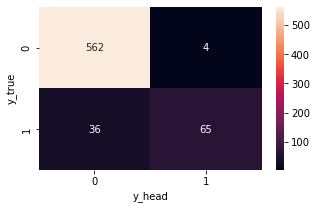

In [24]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred) 
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### 3.4.2 classification_report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       566
           1       0.94      0.64      0.76       101

    accuracy                           0.94       667
   macro avg       0.94      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



In [26]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred, y_test)

0.9400299850074962

###  3.4.3 Roc Curve

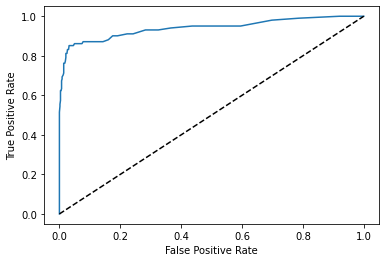

In [27]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]
# Import roc_curve From sklearn.metrics
from sklearn.metrics import roc_curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### 3.4.4 F1 score

In [28]:
# Import f1_score
from sklearn.metrics import f1_score
# Print the F1 score
print(f1_score(y_test, y_pred))

0.7647058823529412


# 4. Model Tuning
Model yang telah dibuat sejauh ini menggunakan hyperparameter default, dan sekarang saya akan belajar menyetelnya. Salah satu cara paling efektif untuk melakukan ini adalah teknik hyperparameter tuning yang dikenal sebagai grid-search cross-validation.

Sumber belajar: https://www.youtube.com/watch?v=K28l_zGH6M0

## 4.1 hyperparameter grid

In [29]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None], #Max depth of tree
              #"max_features": [1, 3, 10], #Number of features for best split
              "bootstrap": [True, False],       # Whether Bootstrap samples are used
              "criterion": ["gini", "entropy"]} # Quality of Split

## 4.2 Modeling

In [30]:
clf2 = RandomForestClassifier()
# Call GridSearchCV
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid)
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None]})

## 4.3 Best parameters

In [31]:
# Print the optimal parameters
print("The Best parameters %s with a score of %0.3f"
      % (grid_search.best_params_, grid_search.best_score_))

The Best parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': None} with a score of 0.949


## 4.4 Prediksi

In [32]:
# Predict the labels of the test set
y_pred2 = grid_search.predict(X_test)

## 4.5 Evaluasi Model

### 4.5.1 confusion_matrix

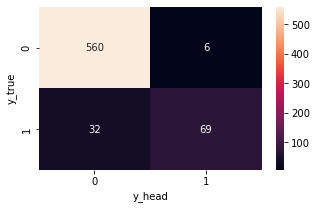

In [33]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred2, y_test)

0.9430284857571214

### 4.5.2 classification_report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.92      0.68      0.78       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



### 4.5.3 Roc Curve

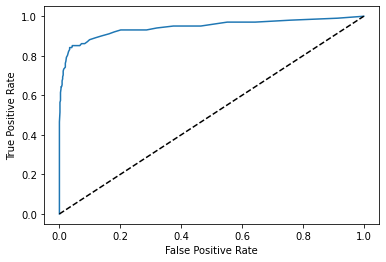

In [35]:
# Generate the probabilities
y_pred_prob2 = grid_search.predict_proba(X_test)[:, 1]
# Import roc_curve From sklearn.metrics
from sklearn.metrics import roc_curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### 4.5.4 F1 score

In [36]:
# Import f1_score
from sklearn.metrics import f1_score
# Print the F1 score
print(f1_score(y_test, y_pred2))

0.7840909090909092


## 4.6 feature importances

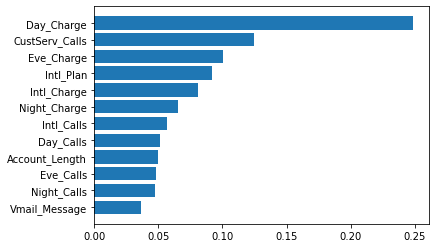

In [37]:
# Calculate feature importances
importances = clf.feature_importances_
# Sort importances
sorted_index = np.argsort(importances)
# Create labels
labels = X.columns[sorted_index]
# Clear current plot
plt.clf()
# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()